<a href="https://colab.research.google.com/github/roydcapella/convnet2/blob/collab/resnet_alexnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


*   Universidad de Chile
*   Postitulo IA
*   Computer Vision
*   Roydith Capella

# Resumen
En este documento se encuentran los resultados obtenidos al momento de experimentar con arquitecturas de redes neuronales convulacionales especificamente AlexNet y ResNet-34 utilizando el dataset Clothing aplicando métodos de optimización tales como Descenso de Gradiente Estocástico (SGD) y Estimación del Momento Adaptativo (ADAM) para medir sus efectos en el proceso de aprendizaje.

# Introduccion


Una  red  de  neuronal es  un modelo  matemático  formado  por  una  serie  de  operaciones  que,  para  un vector  de  entrada  x, ofrece  un  vector de  salida  distinto f(x).

Las neuronas se organizan en capas, donde cada una se conecta con todas las de la capa siguiente. En esta arquitectura, cada conexión tiene asociado un peso, por lo  que  la  principal  operación  que  se  realiza  es una  multiplicación  entre  el valor  de  la  neurona  y  el  de  su  conexión  saliente.  De  esta  manera,  las neuronas de las capas siguientes reciben los resultados anteriores sumados en uno y aplican funciones no lineales para producir un nuevo resultado. 

Uno  de  los  tipos  más  populares  de  redes  neuronales son  las conocidas  como  redes  neuronales  convolucionales que tienen como principal caracteristica el hecho de que cada neurona de una capa no recibe  conexiones  de todas  las  neuronas  de  la  capa anterior,  sino  sólo  de algunas, favoreciendo que cada neurona se especialice en una región de la lista de códigos de la capa anterior, reduciendo drásticamente el número de pesos y de multiplicaciones necesarias


## AlexNet
Es una red neuronal convolucional pre-entrenada que compitió en ImageNet en 2012, un desafío a gran escala de reconocimiento visual en el que consiguió una tasa de error del 15,3%, 10.8 puntos por encima del otro finalista. Alexnet contiene  ochos  capas:  las  cinco  primeras  son  convolucionales, mientras que las tres son Fully Connected Layer como se puede apreciar en la siguiente imagen:


**Arquitectura AlexNet**

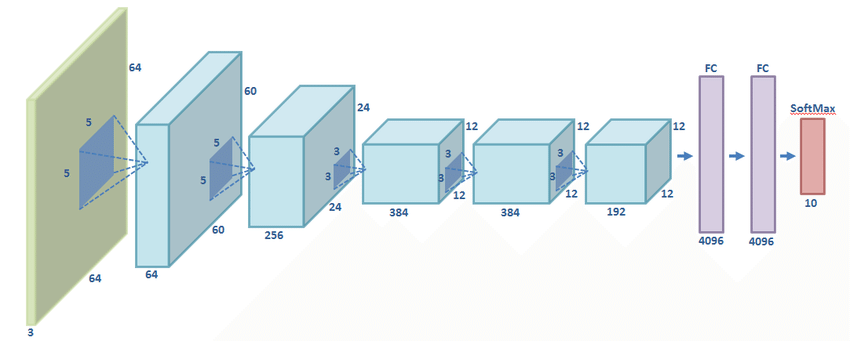

## ResNet
En cambio, la redes residuales o ResNet se inspiran en el hecho biológico de que algunas neuronas se conectan con neuronas en capas no necesariamente contiguas, saltando capas intermedias aumentando el número de capas al introducir una conexión residual con una capa identidad, la cual pasa a la siguiente directamente.

De esta forma permitio entrenar por primera vez redes de más de 100 capas controlando con éxito el problema del Desvanecimiento de Gradiente. Fue propuesta por  Kaiming He y Microsoft en 2015, ganando en ese momento la ILSVRC (ImageNet Large Scale Visual Recognition Challenge) por sus aportes significativos


**Arquitectura ResNet34**
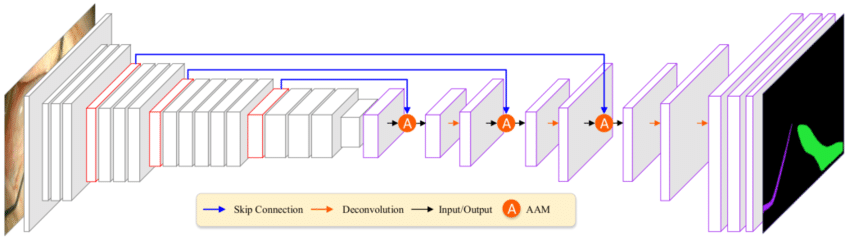


Para obtener mejores resultados en la implementacion de estas redes neuronales se han propuestos varios optimizadores que permiten mejorar los resultados de aciertos y encontrar el minimo de la funcion de perdida en menor tiempo. En esta ocasion, experimentaremos con Stochastic Gradient Descent y Adaptive Moment Estimation. 


## **Stochastic Gradient Descent (SGD)**


> Es un algoritmo de optimización para encontrar los valores de los coeficientes de las variables de una función (f) para minimizar la función de costo.

> La búsqueda de descenso de gradiente determina un vector de peso que minimiza el error al comenzar con algún vector de peso inicial arbitrario y lo modifica gradual y repetidamente en pequeños pasos. Como el gradiente especifica la dirección que produce el ascenso más pronunciado en el error, el negativo de este vector, por lo tanto, da la dirección de la disminución más pronunciada. En cada paso, el vector de peso se modifica en la dirección que produce el descenso más pronunciado junto con el error. Este proceso continúa hasta que se alcanza el error mínimo global.



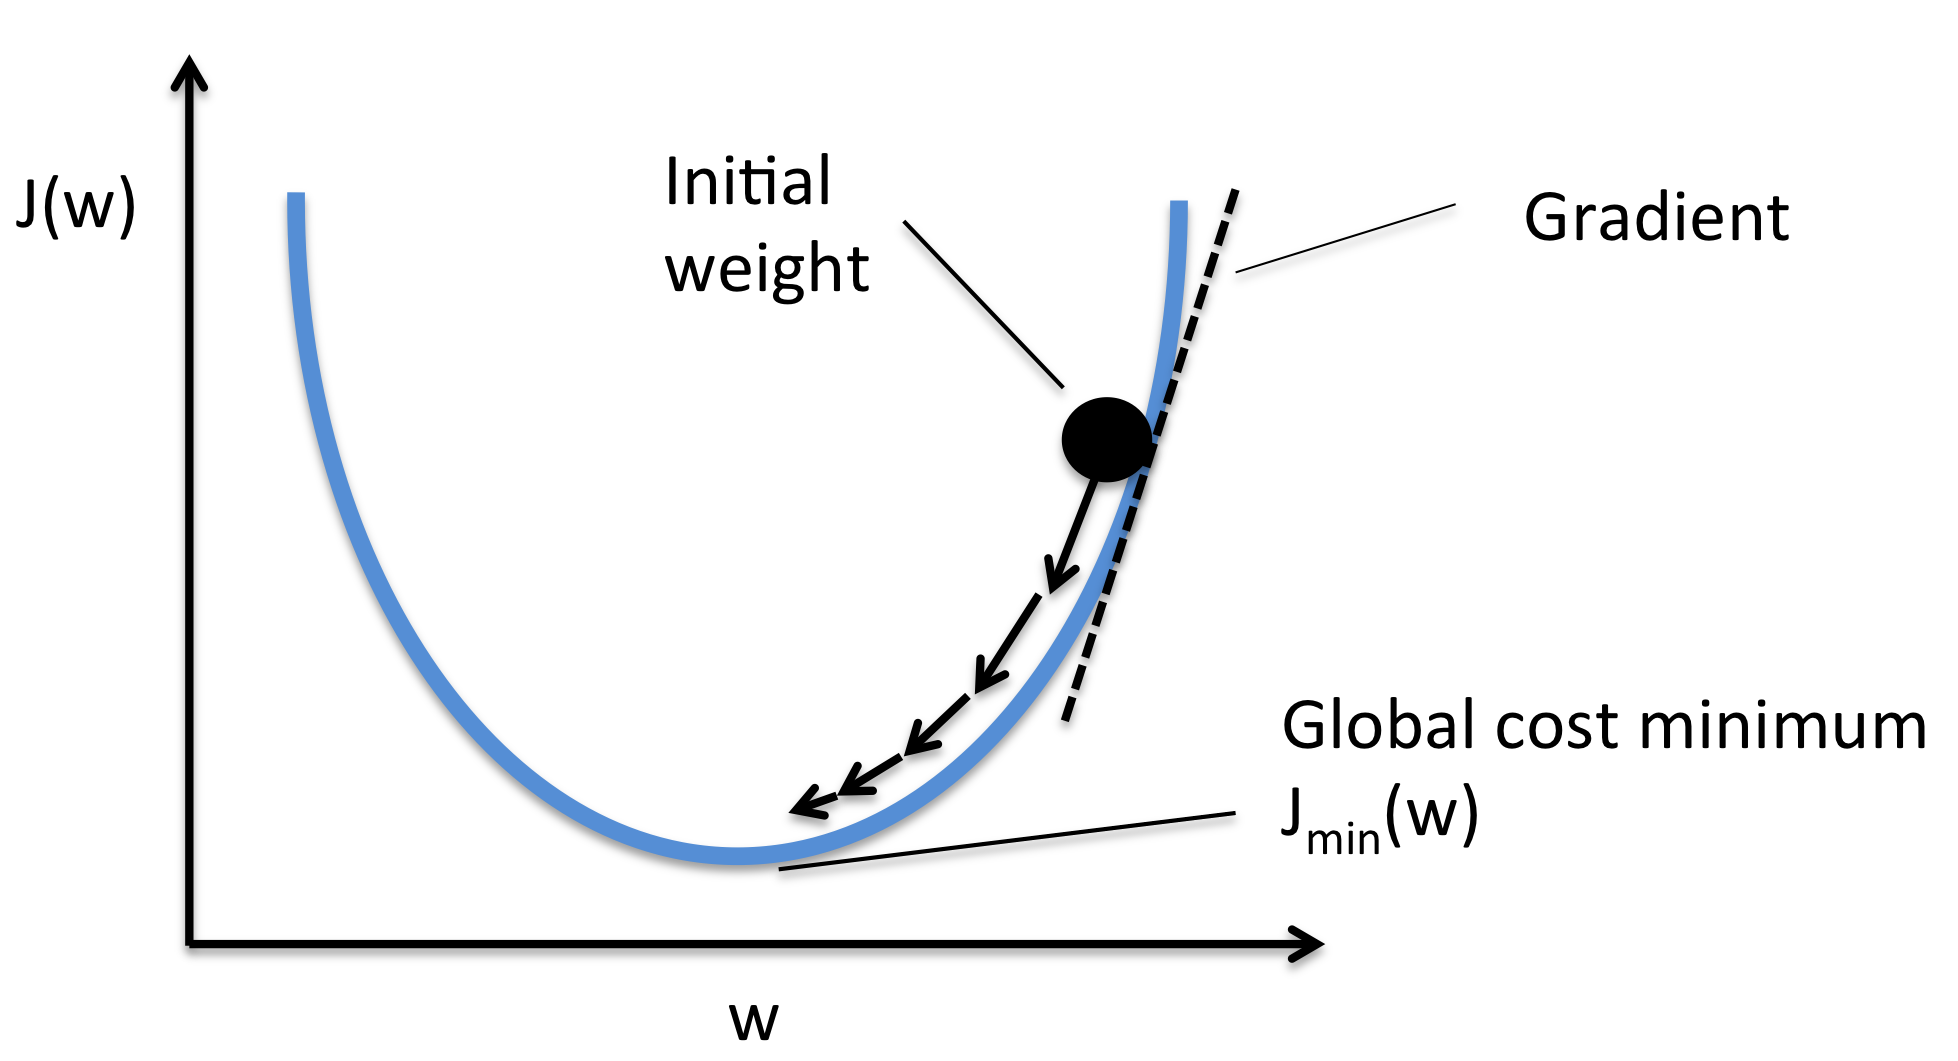

## **Adaptive Moment Estimation**

> Este algoritmo de optimización fue introducido en 2015 por dos investigadores: Diederik P. Kingma y Jimmy Lei Ba. Este algoritmo simplemente estima momentos y los usa para optimizar una función. Es esencialmente una combinación del descenso de gradiente con el algoritmo de impulso y el algoritmo Prop RMS (Root Mean Square).

> El algoritmo de Adam calcula un promedio móvil ponderado exponencial del gradiente y luego eleva al cuadrado el gradiente calculado. Este algoritmo tiene dos parámetros de caída que controlan las tasas de caída de estos promedios móviles calculados.



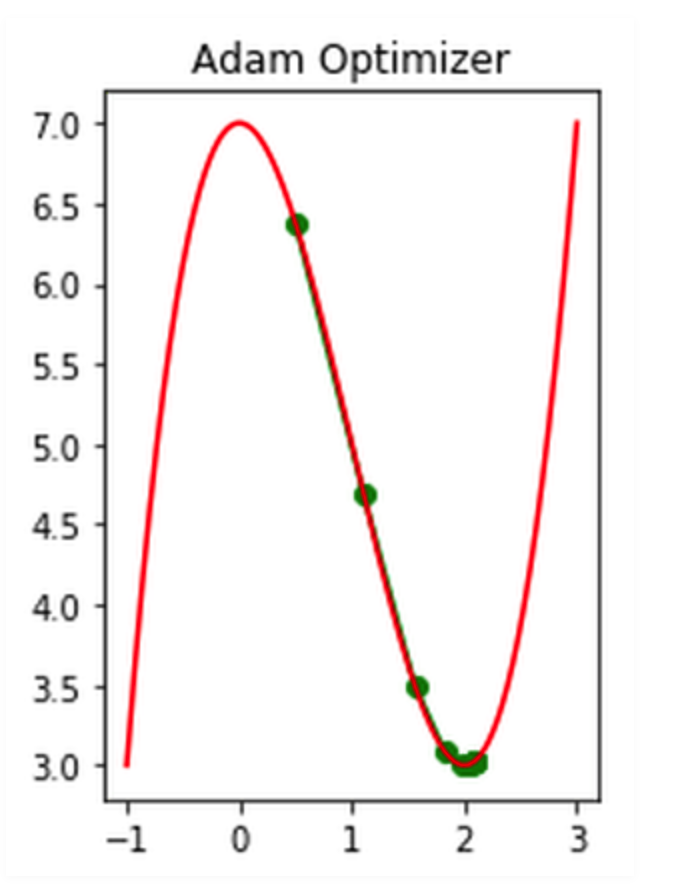


En este trabajo conoceremos como pueden ser implementadas y las principales diferencias al ser aplicados sobre las redes convulucionales comentadas anteriormente

# **Configurando entorno**

In [10]:
print ("Connecting to Google Drive...")
from google.colab import drive
#Si requiere habilitar drive, descomente esta linea
#drive.mount("/content/drive/")
!pwd
# En que directorio desea comenzas. Si no es indicado, tomara el asignado por defecto
#%cd "./drive/My Drive/ia-uchile2020/computer-vision/convnet2"
!ls


'''
!pip install -r requirements.txt
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
     '''

Connecting to Google Drive...
/content/drive/My Drive/ia-uchile2020/computer-vision/convnet2
 clothing-small.zip.1	      'test (1).txt'	   train_2_mean.npy
 computervision_tarea1.ipynb   test_2_mean.npy	   train_2.tfrecords
 configs		       test_2.tfrecords    train_3_mean.npy
 data			       test_3_mean.npy	   train_3.tfrecords
 datasets		       test_3.tfrecords    train_4_mean.npy
 index.ipynb		       test_4_mean.npy	   train_4.tfrecords
'mapping (1).txt'	       test_4.tfrecords    train_5_mean.npy
 mapping.txt		       test_5_mean.npy	   train_5.tfrecords
 mean.dat		       test_5.tfrecords    train_6_mean.npy
 models			       test_6_mean.npy	   train_6.tfrecords
 Pipfile		       test_6.tfrecords    train_7_mean.npy
 predicter.py		       test_7_mean.npy	   train_7.tfrecords
 README.md		       test_7.tfrecords    trainner.py
 release_siamese.py	       tester.py	   train.py
 resnet_alexnet.ipynb	       test_sample	   train_sample
 run-download.sh	       test_selected.py    train_selected

'\n!pip install -r requirements.txt\nfrom google.colab import files\nuploaded = files.upload()\n\nfor fn in uploaded.keys():\n  print(\'User uploaded file "{name}" with length {length} bytes\'.format(\n      name=fn, length=len(uploaded[fn])))\n     '

### Importando repositorio

In [2]:
!pwd
!rm -Rf convnet2/

!git clone https://github.com/roydcapella/convnet2.git

%cd convnet2/
!git checkout collab

/content/drive/My Drive/ia-uchile2020/computer-vision
Cloning into 'convnet2'...
remote: Enumerating objects: 409, done.
remote: Counting objects: 100% (409/409), done.
remote: Compressing objects: 100% (206/206), done.
remote: Total 409 (delta 248), reused 345 (delta 192), pack-reused 0
Receiving objects: 100% (409/409), 24.65 MiB | 17.60 MiB/s, done.
Resolving deltas: 100% (248/248), done.
/content/drive/My Drive/ia-uchile2020/computer-vision/convnet2
Branch 'collab' set up to track remote branch 'collab' from 'origin'.
Switched to a new branch 'collab'




---



# **Antes de continuar**
Ejecute esta celda para que se cargen algunos metodos que son utilizados mas adelante

In [61]:
##importando algunas dependencias
import numpy as np
import argparse
import os
import matplotlib as plt
import pickle
import skimage.io as io
import skimage.color as color
import skimage.morphology as morph
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
import pandas as pd
import skimage.transform as transf
import random
import threading
from datetime import datetime
from tqdm import tqdm
import sys
sys.path.append('.')
import utils.configuration as conf
import datasets.data as data
#from __future__ import absolute_import, division, print_function, unicode_literals
from tensorflow import keras
from tensorflow.keras import layers
#tf.keras.backend.clear_session()  # Para restablecer fácilmente el estado del portátil.
from models import resnet
from models import alexnet
import utils.metrics as metrics
import utils.losses as losses
import utils.imgproc as imgproc


def plotAccuracyLoss(name, training_file):
    """Imprime la comparativa entre Accuracy y Loss para el entrenamiento de un modelo dado
      Parámetros:
        name -- Nombre del modelo 
        training_file -- ubicacion del archivo que quiere ser pintado
      Excepciones:
      FileNotFoundError -- Si el archivo historico no ha sido encontrado
      """
    with open(training_file, 'rb') as handle: 
      tr = pickle.load(handle)
    plt.figure(figsize=(20,5))
    plt.suptitle(name)
    plt.subplot(1,2,2)
    plt.xlabel('# Epocas')
    plt.plot(tr['accuracy'], label ='train_accuracy') 
    plt.plot(tr['val_accuracy'], label ='val_accuracy')
    plt.legend(loc="lower right", title="Accuracy", frameon=False)
    plt.subplot(1,2,1)
    plt.xlabel('# Epocas')
    plt.plot(tr['loss'], label ='train_loss')
    plt.plot(tr['val_loss'], label ='val_loss')
    plt.legend(loc="upper right", title="Loss", frameon=False)
    plt.show()

def plotMultipleAccuracyLoss(name, training_history):
    plt.figure(figsize=(20,5))
    plt.suptitle(name)
    for training in training_history:
      model = training[0]
      filename = training[1]
      with open(filename, 'rb') as handle: 
        tr = pickle.load(handle)
      plt.subplot(1,2,1)
      plt.plot(tr['val_loss'], label = model + ' loss')
      plt.subplot(1,2,2)
      plt.plot(tr['val_accuracy'], label = model + ' accuracy')
    plt.subplot(1,2,1)
    plt.xlabel('Época')
    plt.legend(loc="upper right", title="Loss", frameon=False)
    plt.subplot(1,2,2)
    plt.xlabel('Época')
    plt.legend(loc="lower right", title="Accuracy", frameon=False)
    plt.show()

def plotPredictions(model, classes, elements, mean_image, target_size):
        plt.figure(figsize=(13,13))
        true_positive = 0
        size = len(elements)
        i = 0
        for index,item in enumerate(elements):
            label = item[0]
            real = item[1]
            filename = item[2]
            image1 = imgproc.process_image(data.read_image(filename, 3), target_size)
            image2 = image1 - mean_image
            image = tf.expand_dims(image2, 0)        
            pred = model.predict(image)
            pred = pred[0]
            pred = np.exp(pred - max(pred))
            pred = pred / np.sum(pred)            
            prediction = classes[np.argmax(pred)]
            i = 1 if i >= 15 else i + 1
            plt.subplot(size/5,5,i)
            plt.xticks([])
            plt.yticks([])
            plt.imshow(image1)
            color='red'
            if real == prediction :
              color='blue'
              true_positive += 1
            title= "R: {0} vs P: {1} ".format(real, prediction)
            #print(title)
            plt.xlabel(title, color=color, fontsize=15)
        
        resume = "Se han acertado {0} de {1}".format(true_positive,size)
        plt.suptitle(resume)
        plt.tight_layout()
        plt.show()

def get_classes_from(mapping_file):
  items=[]
  assert os.path.exists(mapping_file)        
  with open(mapping_file, "r") as ins:
      arr = ins.read().split("\n") 
      for line in arr:
        classe=line.split("\t")[0]
        if classe !='':
          items.append(classe)  
  return items

def get_images_from(sample_file, classes, size):
  assert os.path.exists(sample_file)        
  # reading data from files, line by line
  filenames = []
  with open(sample_file) as file :        
    lines = [line.rstrip() for line in file]     
    random.shuffle(lines)
    _lines = [tuple(line.rstrip().split('\t'))  for line in lines ] [:size]
    filemap, labels = zip(*_lines)
    labels=np.array(labels).astype('int').tolist()
    for index, item in enumerate(labels):
      filenames.append([item, classes[item], filemap[index]])
  return filenames


def get_alexnet(input_image, num_classes,  model_path = ''):
  model = alexnet.AlexNetModel(num_classes)
  model(input_image)    
  if model_path != '':
    model.load_weights(model_path)
  return model

def get_restnet(block_sizes, filters, input_image, num_classes, model_path = ''):
  model = resnet.ResNet(block_sizes, filters, num_classes, se_factor = 0)
  model(input_image)
  if model_path != '':
    model.load_weights(model_path)
  model.summary()
  return model

def get_optimizer_sgd(learning_rate, decay_steps, momentum, alpha = 0.0001, nesterov = True):
  lr_schedule = tf.keras.experimental.CosineDecay(initial_learning_rate = learning_rate,
                                                decay_steps = decay_steps,
                                                alpha = alpha)
  optimizer = tf.keras.optimizers.SGD(learning_rate = lr_schedule, momentum = momentum , nesterov = nesterov)
  return optimizer

def get_optimizer_adam():
  optimizer = tf.keras.optimizers.Adam()
  return optimizer

def compile(model, optimizer):
  print("compile {}".format(model.name))
  model.compile(optimizer=optimizer,loss= losses.crossentropy_loss, metrics=['accuracy'])
  model.summary()
  return model

def retrieve_dataset(data_dir, num_classes, num_threads, shuffle_size, batch_size):
  if num_threads > 0:
    tfr_train_file=[os.path.join(data_dir, "train_{}.tfrecords".format(idx)) for idx in range(num_threads)]
    tfr_test_file=[os.path.join(data_dir, "test_{}.tfrecords".format(idx)) for idx in range(num_threads)]      
  else:
    tfr_train_file = os.path.join(data_dir, "train.tfrecords")
    tfr_test_file = os.path.join(data_dir, "test.tfrecords")
    #sys.stdout.flush()

  mean_file = os.path.join(data_dir, "mean.dat")
  shape_file = os.path.join(data_dir,"shape.dat")

  input_shape =  np.fromfile(shape_file, dtype=np.int32)
  mean_image = np.fromfile(mean_file, dtype=np.float32)
  mean_image = np.reshape(mean_image, input_shape)

  #loading tfrecords into dataset object
  #train
  tr_dataset = tf.data.TFRecordDataset(tfr_train_file)
  tr_dataset = tr_dataset.map(lambda x : data.parser_tfrecord(x, input_shape, mean_image, num_classes, with_augmentation = True));    
  tr_dataset = tr_dataset.shuffle(shuffle_size)        
  tr_dataset = tr_dataset.batch(batch_size = batch_size)    
  #'test'
  val_dataset = tf.data.TFRecordDataset(tfr_test_file)
  val_dataset = val_dataset.map(lambda x : data.parser_tfrecord(x, input_shape, mean_image, num_classes, with_augmentation = False));    
  val_dataset = val_dataset.batch(batch_size = batch_size)

  #define the model input
  input_image = tf.keras.Input((input_shape[0], input_shape[1], input_shape[2]), name = 'input_image')
  return  tr_dataset, val_dataset, input_image, mean_image



In [ ]:
!git pull

Updating d9f9a5e..992c8a7
Fast-forward
 configs/clothing-small-adam.config    | 2 +-
 configs/clothing-small-base.config    | 2 +-
 configs/clothing-small-minimal.config | 2 +-
 configs/clothing-small-sgd.config     | 2 +-
 train.py                              | 2 +-
 5 files changed, 5 insertions(+), 5 deletions(-)


# **Preparando datos**

## Desde cero
Solo requerido si se desea crear un nuevo tfrecords


### Descargando datasets

In [18]:
#Obtenemos nuestos datasets y lo posicionamos en la raiz de nuestro proyecto
!echo "downloading dataset... "
!wget https://www.dropbox.com/s/c3h9e0o6ajydbao/clothing-small.zip
!unzip -uq 'clothing-small.zip' -d '.'
#!rm clothing-small.zip
!mv clothing-small/* .
!mv test_sample.txt test.txt
!mv train_sample.txt train.txt
!pwd

[Errno 2] No such file or directory: 'convnet2/'
/content/drive/My Drive/ia-uchile2020/computer-vision/convnet2
downloading dataset... 
--2020-11-15 05:27:45--  https://www.dropbox.com/s/c3h9e0o6ajydbao/clothing-small.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.1, 2620:100:601c:1::a27d:601
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/c3h9e0o6ajydbao/clothing-small.zip [following]
--2020-11-15 05:27:45--  https://www.dropbox.com/s/raw/c3h9e0o6ajydbao/clothing-small.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3e432afa3b9b6307e7282eaa33.dl.dropboxusercontent.com/cd/0/inline/BDM4MrfNOXRwkf6ehAIaU1CSIn27b3rKBTWn83uetYTkbpSUqDN3HGgbgNIWtMaYuZY8wI47GImnGr_RBrgyIyjpyr9bDFoKU0maio7_XO_PP-I3KHC-9GH5FkJ9Ot9jwog/file# [following]
--2020-11-15 05:27:45--  https://uc3e432afa3b9b6307e7282eaa3

### Generando secuencia de registros binarios (TF Records)

In [38]:
#running with CLOTHING_SMALL_BASE
!pwd
!python ./datasets/create_tfrecords.py -type all -config configs/clothing-small-base.config -name CLOTHING_SMALL_BASE


/content/drive/My Drive/ia-uchile2020/computer-vision/convnet2
2020-11-15 06:14:20.757705: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
creating tfrecords in.
the data dir is  .
./train.txt
create_tfrecords_threads ('train_sample/7c560638-953d-4921-a.png', 'train_sample/62d0f47d-3bef-4ce5-9.png', 'train_sample/c09b784c-dc30-486e-a.png', 'train_sample/44e2a993-ba94-4aa8-a.png', 'train_sample/6fd7111e-08d1-4afd-b.png', 'train_sample/731f0e82-9217-4a0c-b.png', 'train_sample/1a793f59-dbba-450d-8.png', 'train_sample/b5e1744d-7a60-4c26-b.png', 'train_sample/404a0d6b-6342-400e-8.png', 'train_sample/2a3b668b-3368-4834-a.png', 'train_sample/17d6caa8-b100-4ca9-a.png', 'train_sample/988fb9e3-b64f-4027-9.png', 'train_sample/0117dd6b-f5dd-4c0f-8.png', 'train_sample/8c211627-4040-453d-8.png', 'train_sample/86a58a72-c7e5-4c8f-a.png', 'train_sample/84487f92-dbdf-40f7-8.png', 'train_sample/52d150ef-af1c-4a7d-b.png', 'train_sample/

## Cargando TF Records

> Si se ha configurado un tfrecords esta es la mejor opcion para no partir de cero y aprovechar el tiempo



### Descargando TF Records

In [25]:
#Obtenemos un tf records+
!echo "downloading tf-records... "
!wget https://www.dropbox.com/s/c3h9e0o6ajydbao/tf-records.zip
!mv 'tf-records.zip' data/
!unzip -uq 'data/tf-records.zip' -d 'data/'
!rm "data/tf-records.zip"
!rm -Rf "clothing-small"


downloading tf-records... 
--2020-11-15 05:46:33--  https://www.dropbox.com/s/c3h9e0o6ajydbao/tf-records.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:601c:1::a27d:601
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/c3h9e0o6ajydbao/tf-records.zip [following]
--2020-11-15 05:46:33--  https://www.dropbox.com/s/raw/c3h9e0o6ajydbao/tf-records.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3e432afa3b9b6307e7282eaa33.dl.dropboxusercontent.com/cd/0/inline/BDM4MrfNOXRwkf6ehAIaU1CSIn27b3rKBTWn83uetYTkbpSUqDN3HGgbgNIWtMaYuZY8wI47GImnGr_RBrgyIyjpyr9bDFoKU0maio7_XO_PP-I3KHC-9GH5FkJ9Ot9jwog/file# [following]
--2020-11-15 05:46:33--  https://uc3e432afa3b9b6307e7282eaa33.dl.dropboxusercontent.com/cd/0/inline/BDM4MrfNOXRwkf6ehAIaU1CSIn27b3rKBTWn83uetYTkbpSUqDN3HGgbgNIWtMaYuZY8wI47GImnGr_RB

### Cargando en memoria TF Records

# **Fase de entrenamiento**:


## Desde cero
Solo si es requerido volver a entrenar para generar nuevos modelos


### *Alexnet*


**Stochastic gradient descent (SGD)**

In [ ]:
!python train_selected.py -config configs/clothing-small-sgd.config -arch alexnet -name CLOTHING_SMALL_SGD -method sgd -mode train -save True


python3: can't open file 'train_selected.py': [Errno 2] No such file or directory


**Adaptive Moment Estimation (Adam)** 

In [ ]:
!python train_selected.py -config configs/clothing-small-adam.config -arch alexnet -name CLOTHING_SMALL_ADAM -method adam -mode train -save True



---



### *Resnet*


**Stochastic gradient descent (SGD)**

In [ ]:
!python train_selected.py -config configs/clothing-small-sgd.config -arch resnet -name CLOTHING_SMALL_SGD -method sgd -mode train -save True


2020-11-15 04:42:02.488955: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Initializing CLOTHING_SMALL_SGD with resnet in sgd in mode train 
2020-11-15 04:42:05.764039: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-11-15 04:42:05.883848: E tensorflow/stream_executor/cuda/cuda_driver.cc:314] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2020-11-15 04:42:05.883940: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (448273fccac7): /proc/driver/nvidia/version does not exist
2020-11-15 04:42:06.060046: I tensorflow/core/platform/profile_utils/cpu_utils.cc:104] CPU Frequency: 2200000000 Hz
2020-11-15 04:42:06.060541: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1880840 initialized for platform Host (this does not guarantee that XLA wi

**Adaptive Moment Estimation (Adam)** 

In [ ]:
!python train_selected.py -config configs/clothing-small-adam.config -arch resnet -name CLOTHING_SMALL_ADAM -method adam -mode train -save True

## Desde modelos ya creados
Dado que tenemos algunos modelos preentrenados podemos utilizarlos para generar nuestras metricas y predecir nuestros resultados


In [21]:
#Obtenemos un tf records+
!echo "downloading models... "
!wget https://www.dropbox.com/s/xrghihzd7xokqlw/models.zip
!mv 'models.zip' ./data/
!unzip -uq 'data/models.zip' -d 'data/'
!mv data/models/* data/
!rm "data/models.zip"
!rm -Rf "data/models"

downloading models... 


## Analisis de resultados


### *Alexnet*


**Stochastic gradient descent (SGD)**

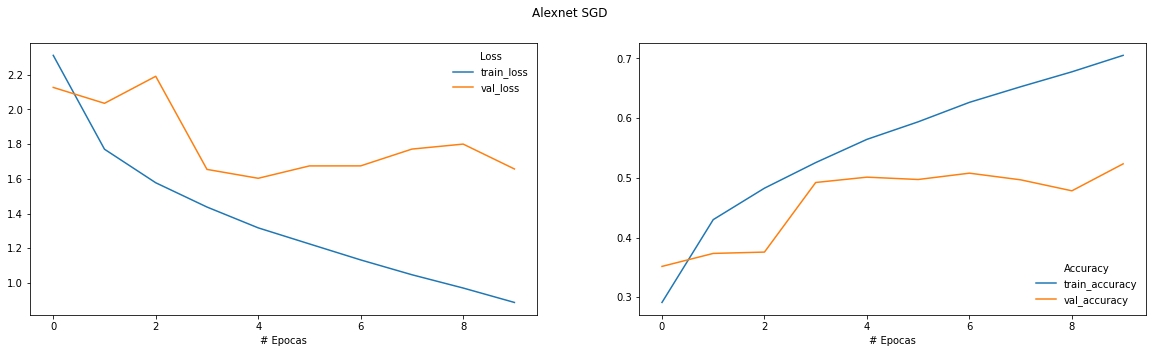

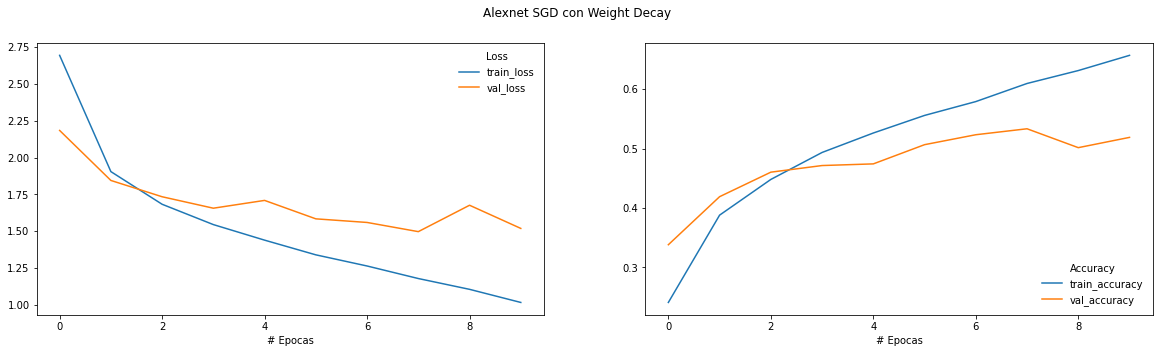

In [64]:
plotAccuracyLoss("Alexnet SGD", "data/alexnet/sgd/training.txt")
plotAccuracyLoss("Alexnet SGD con Weight Decay", "data/alexnet/sgd/training-decay.txt")


**Adaptive Moment Estimation (Adam)** 

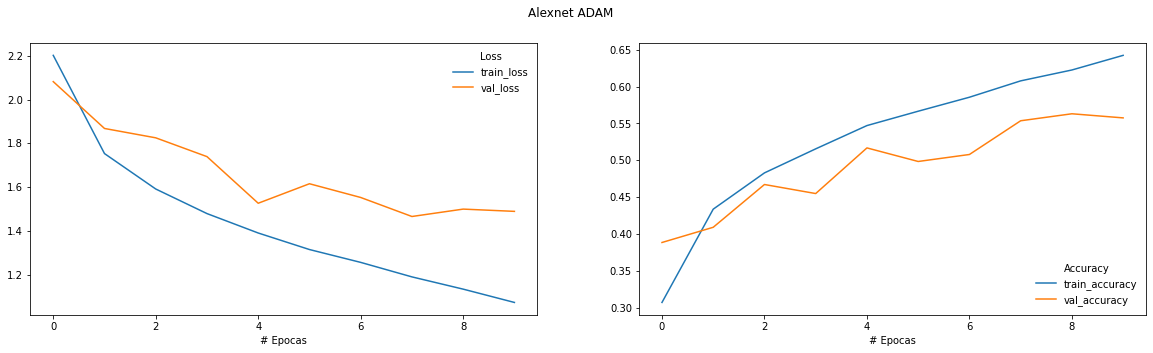

In [67]:
plotAccuracyLoss("Alexnet ADAM", "data/alexnet/adam/training.txt")

### *Resnet*


**Stochastic gradient descent (SGD)**

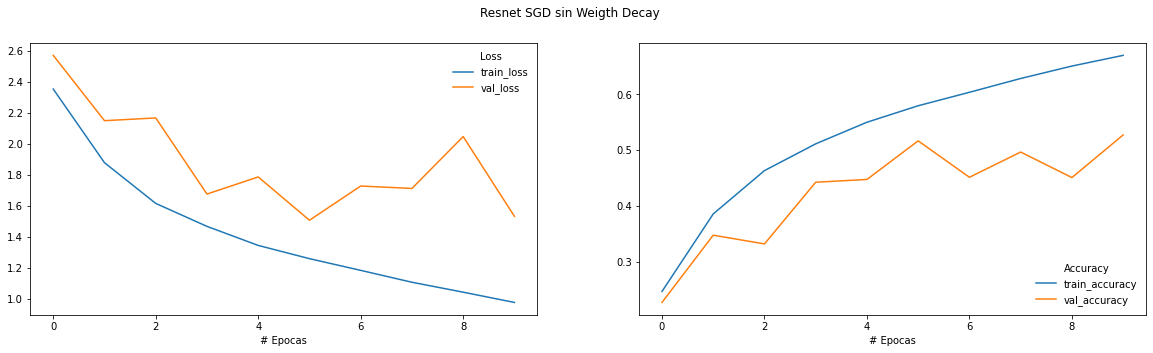

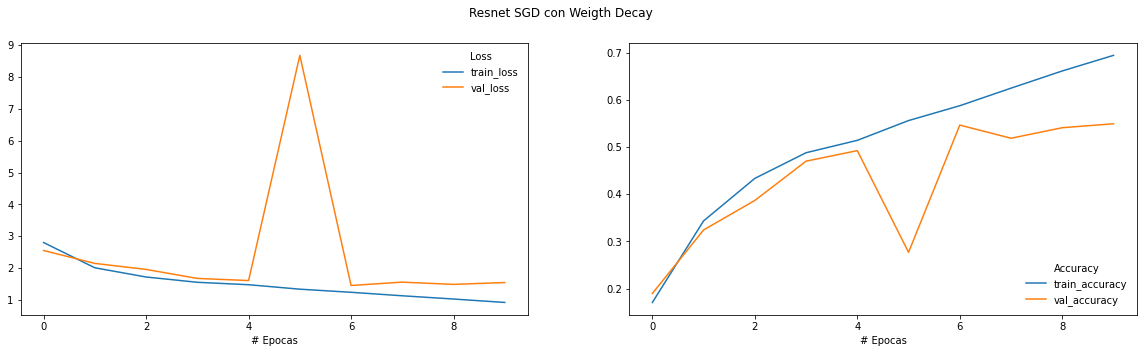

In [71]:
plotAccuracyLoss("Resnet SGD sin Weigth Decay", "data/resnet/sgd/training.txt")

plotAccuracyLoss("Resnet SGD con Weigth Decay", "data/resnet/sgd/training-decay.txt")




**Adaptive Moment Estimation (Adam)** 

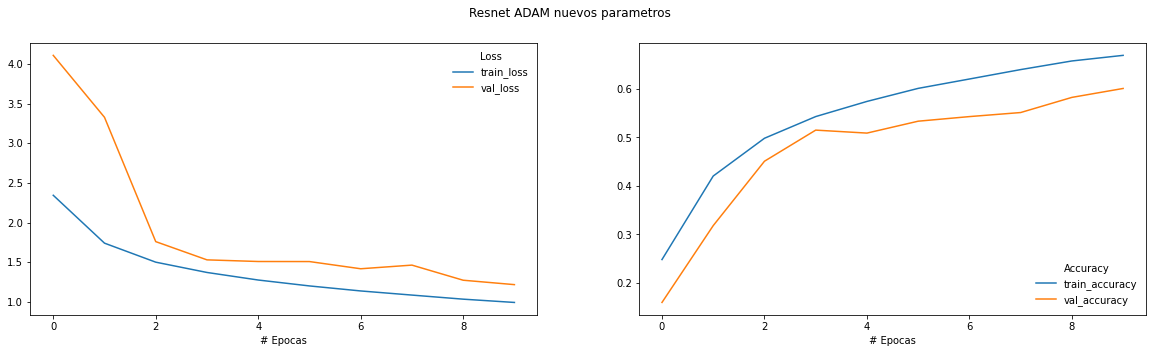

{'accuracy': [0.24805328249931335,
  0.420364648103714,
  0.4982643723487854,
  0.5430153012275696,
  0.5742564797401428,
  0.6011821031570435,
  0.6205084919929504,
  0.6399286985397339,
  0.6577227115631104,
  0.6692935824394226],
 'loss': [2.34321928024292,
  1.7399060726165771,
  1.5003403425216675,
  1.370512843132019,
  1.2752445936203003,
  1.200792670249939,
  1.137520432472229,
  1.0854499340057373,
  1.0339674949645996,
  0.9926255941390991],
 'val_accuracy': [0.1595982164144516,
  0.3180803656578064,
  0.4508928656578064,
  0.5150669813156128,
  0.5089285969734192,
  0.5334821343421936,
  0.54296875,
  0.5513392686843872,
  0.5825892686843872,
  0.6010044813156128],
 'val_loss': [4.1069722175598145,
  3.326118230819702,
  1.7591784000396729,
  1.5293567180633545,
  1.508709192276001,
  1.507912278175354,
  1.4171701669692993,
  1.463139533996582,
  1.272700309753418,
  1.2171459197998047]}

In [58]:
#plotAccuracyLoss("Resnet ADAM inicial", "data/resnet/adam/training-firstconfig.txt")

plotAccuracyLoss("Resnet ADAM nuevos parametros", "data/resnet/adam/training-optimal.txt")



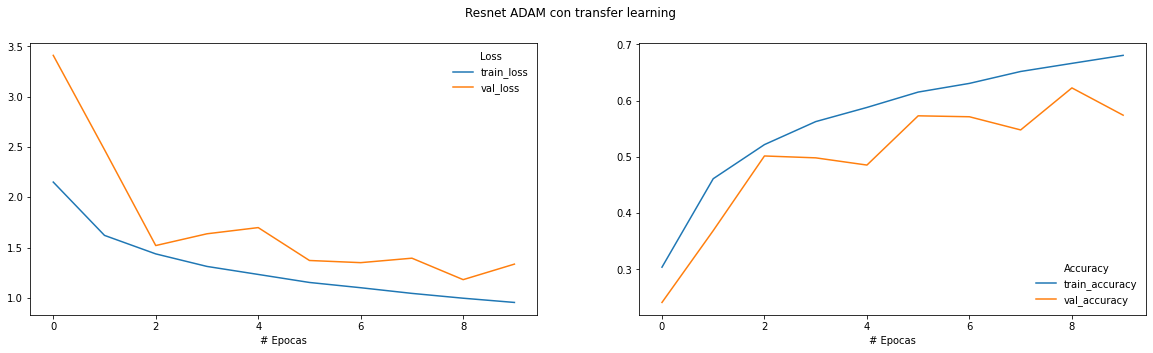

In [39]:
plotAccuracyLoss("Resnet ADAM con transfer learning", "data/resnet/adam/training-tlearning.txt")


### Conclusiones

Una vez analizados los graficos correspondientes a las etapas de entrenamiento con ambas redes y aplicando los optimizadores SGD y ADAM podemos visualizar que:
  
  En AlexNet: 

1.   Elemento de la lista
2.   Elemento de la lista







> mejor loss y acurracy restnet adam



Comparativa General para Resnet y Alexnet


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

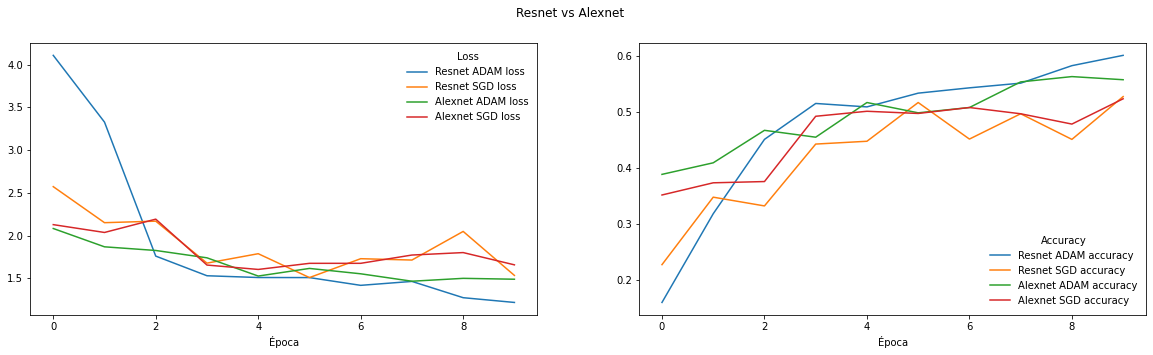

In [15]:
print ("Comparativa General para Resnet y Alexnet")
training_history = [("Resnet ADAM", "data/resnet/adam/training-optimal.txt"), 
                    ("Resnet SGD", "data/resnet/sgd/training.txt"),
                    ("Alexnet ADAM", "data/alexnet/adam/training.txt"), 
                    ("Alexnet SGD", "data/alexnet/sgd/training.txt"),
                    ]

plotMultipleAccuracyLoss("Resnet vs Alexnet", training_history)


# **Fase de validacion**

## Fase previa

### **Cargamos en memoria los datos de entrenamiento y testing**

In [5]:
tr_dataset, val_dataset, input_image, mean_image = retrieve_dataset(data_dir = ".", num_classes = 19, num_threads = 8, shuffle_size = 800, batch_size = 1)


### **Cargamos en memoria los modelos que usaremos para validar y predecir**

In [10]:
sgd = get_optimizer_sgd(learning_rate = 0.1,
                        decay_steps = 4000, 
                        momentum = 0.9, 
                        nesterov = True)

adam = get_optimizer_adam()

### **Recuperamos RestNet**

In [7]:
#Paths
resnet_sgd_path = '/content/drive/My Drive/Tarea/ResNet SGD/010.h5'
resnet_adam_path = '/content/drive/My Drive/Tarea/ResNet Adam/010.h5'

In [ ]:

resnet_sgd = get_restnet(block_sizes= [3,4,6,3],
                    filters = [64,128,256,512],
                    input_image = input_image, 
                    num_classes = 19,
                    model_path = resnet_sgd_path
                    )   
compile(resnet_sgd, sgd)
 

In [ ]:
resnet_adam = get_restnet(block_sizes= [3,4,6,3],
                    filters = [64,128,256,512],
                    input_image = input_image, 
                    num_classes = 19,
                    model_path = resnet_adam_path
                    )  
compile(resnet_adam, adam)

### **Recuperamos AlexNet** 

In [8]:
alexnet_sgd_path = '/content/drive/My Drive/Tarea/AlexNet SGD/010.h5'
alexnet_adam_path = '/content/drive/My Drive/Tarea/AlexNet Adam/010.h5'

In [ ]:
alexnet_sgd = get_alexnet(input_image = input_image, 
                    num_classes = 19,
                    model_path = alexnet_sgd_path
                    )      
compile(alexnet_sgd, sgd)


In [ ]:
alexnet_adam = get_alexnet(input_image = input_image, 
                    num_classes = 19,
                    model_path = alexnet_adam_path
                    )    
  
compile(alexnet_adam, adam)


### **Probando**

In [119]:

resnet_sgd_mix = get_restnet(block_sizes= [3,4,6,3],
                    filters = [64,128,256,512],
                    input_image = input_image, 
                    num_classes = 19,
                    model_path = alexnet_sgd_path
                    )   
compile(resnet_sgd_mix, sgd)
 

Model: "res_net_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
backbone (ResNetBackbone)    (None, 7, 7, 512)         21298112  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 512)               0         
_________________________________________________________________
classifier (Dense)           (None, 19)                9747      
Total params: 21,307,859
Trainable params: 21,292,627
Non-trainable params: 15,232
_________________________________________________________________
compile res_net_2
Model: "res_net_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
backbone (ResNetBackbone)    (None, 7, 7, 512)         21298112  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 512)               0         
___

## Evaluamos nuestros modelos

### AlexNet

**Stochastic gradient descent (SGD)**

In [ ]:
alexnet_sgd.evaluate(val_dataset, steps = 14)

**Adaptive Moment Estimation (Adam)** 

In [ ]:
alexnet_adam.evaluate(val_dataset, steps = 14)

### ResNet

**Stochastic gradient descent (SGD)**

In [240]:
resnet_sgd.evaluate(val_dataset, steps = 14)

14/14 [==============================] - 0s 14ms/step - loss: 1.4764 - accuracy: 0.6429


[1.47635018825531, 0.6428571343421936]

**Adaptive Moment Estimation (Adam)** 

In [ ]:
resnet_adam.evaluate(val_dataset, steps = 14)

### Conclusiones



> Bloc con sangría



## Realizamos Predicciones

### **Fase previa**



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:98: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


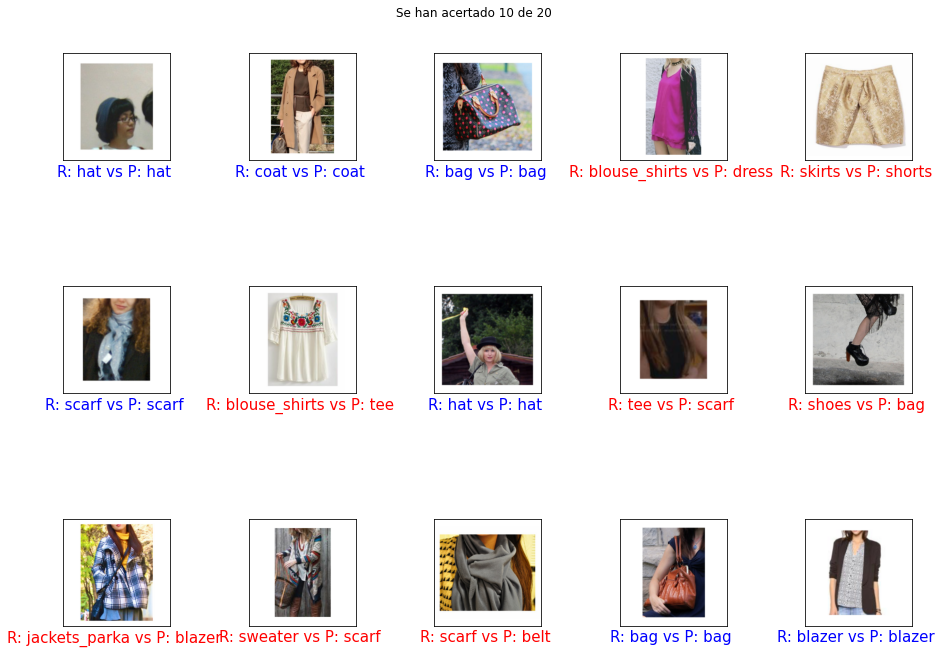

In [123]:
#definimos los elementos con los cuales haremos predicciones
mapping_file = os.path.join('.',  "mapping.txt")    
sample_file = os.path.join('.',  "test.txt")  
classes = get_classes_from(mapping_file)
elements = get_images_from(sample_file,classes,20)
target_size = (224, 224)

plotPredictions(resnet_sgd_mix, classes, elements, mean_image,target_size )

### AlexNet

**Stochastic gradient descent (SGD)**

In [ ]:
plotPredictions(alexnet_sgd, classes, elements, mean_image,target_size )

**Adaptive Moment Estimation (Adam)** 

In [ ]:
plotPredictions(alexnet_adam, classes, elements, mean_image,target_size )

### ResNet

**Stochastic gradient descent (SGD)**

In [ ]:
plotPredictions(resnet_sgd, classes, elements, mean_image,target_size )

**Adaptive Moment Estimation (Adam)** 

In [ ]:
plotPredictions(resnet_adam, classes, elements, mean_image,target_size )

### Conclusiones



> Bloc con sangría



# **Comentarios finales**




> Bloc con sangría

